In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the data
path = 'Salary_Data.csv'

df = pd.read_csv(path)
df = df.dropna()

df['Education Level'] = df['Education Level'].replace("Bachelor's Degree", "Bachelor's")
df['Education Level'] = df['Education Level'].replace("phD", "PhD")
df['Education Level'] = df['Education Level'].replace("Master's Degree", "Master's")


# Step 2: Separate features and target
X = df.drop('Salary', axis=1)
y = df['Salary']





In [22]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create preprocessing steps for numeric and categorical data
numeric_features = ['Age', 'Years of Experience']
categorical_features = ['Gender', 'Education Level', 'Job Title']

numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 5: Create a pipeline with preprocessor and linear regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

In [18]:
X_train

,Age,Gender,Education Level,Job Title,Years of Experience
3426,39.0,Male,Master's,Senior HR Generalist,10.0
1552,38.0,Female,Master's,Back end Developer,10.0
6021,35.0,Female,PhD,Research Director,12.0
4461,30.0,Female,High School,Junior Sales Associate,1.0
3286,23.0,Female,Bachelor's,Software Engineer,1.0
...,...,...,...,...,...
3776,29.0,Male,Bachelor's,Software Engineer,4.0
5195,38.0,Female,Master's,Marketing Director,14.0
5230,25.0,Male,Bachelor's,Junior Software Engineer,1.0
5395,27.0,Male,Bachelor's,Junior Software Engineer,1.0


In [23]:
# Step 6: Fit the model
model.fit(X_train, y_train)

feature_names = (
    model.named_steps['preprocessor']
    .named_transformers_['cat']
    .named_steps['onehot']
    .get_feature_names_out(categorical_features)
    .tolist()
)
feature_names = numeric_features + feature_names

# Step 7: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"R-squared score: {r2:.2f}")

# Step 9: Example of using the model for prediction
new_data = pd.DataFrame({
    'Age': [27, 27, 27],
    'Gender': ['Male', 'Male', 'Male'],
    'Education Level': ["High School", "Bachelor's", "Master's"],
    'Job Title': ['Software Engineer', 'Software Engineer', 'Software Engineer'],
    'Years of Experience': [7, 7, 7]
})

predicted_salary = model.predict(new_data)
for i, salary in enumerate(predicted_salary):
    print(f"Person {i+1} predicted salary: ${salary:.2f}")

Mean squared error: 455741741.41
R-squared score: 0.84
Person 1 predicted salary: $108449.85
Person 2 predicted salary: $123856.81
Person 3 predicted salary: $129783.50


In [20]:
X_train

,Age,Gender,Education Level,Job Title,Years of Experience
3426,39.0,Male,Master's,Senior HR Generalist,10.0
1552,38.0,Female,Master's,Back end Developer,10.0
6021,35.0,Female,PhD,Research Director,12.0
4461,30.0,Female,High School,Junior Sales Associate,1.0
3286,23.0,Female,Bachelor's,Software Engineer,1.0
...,...,...,...,...,...
3776,29.0,Male,Bachelor's,Software Engineer,4.0
5195,38.0,Female,Master's,Marketing Director,14.0
5230,25.0,Male,Bachelor's,Junior Software Engineer,1.0
5395,27.0,Male,Bachelor's,Junior Software Engineer,1.0



Feature Importance:
                       feature    importance
0                          Age    605.763264
1          Years of Experience   4652.394997
2                Gender_Female   6327.072382
3                  Gender_Male   5904.558603
4                 Gender_Other  12231.630985
5   Education Level_Bachelor's    701.713214
6  Education Level_High School  14705.249244
7     Education Level_Master's   6628.401006
8          Education Level_PhD   7375.135023


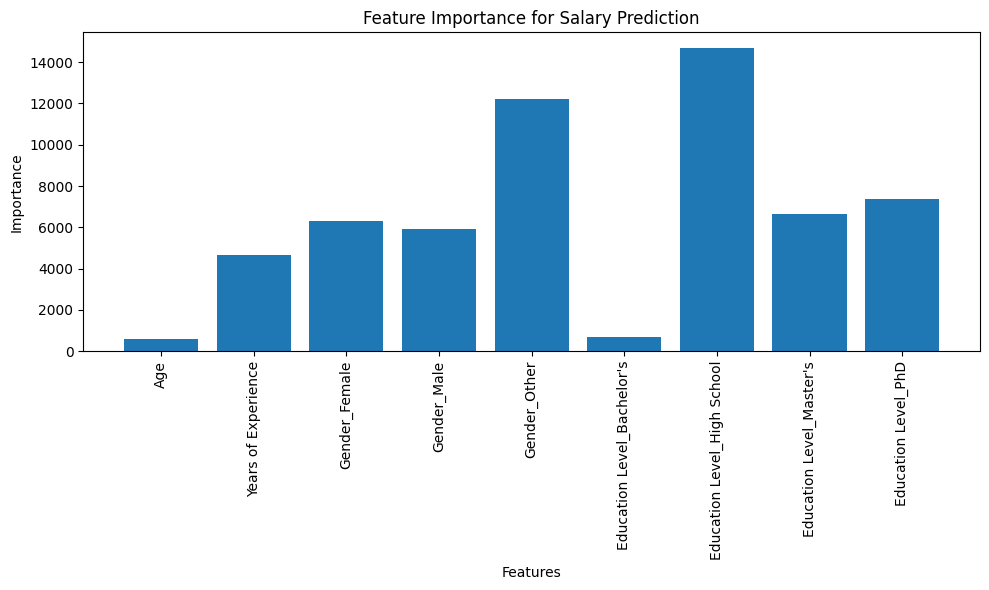

In [24]:
import matplotlib.pyplot as plt





feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': abs(model.named_steps['regressor'].coef_)
})

feature_importance = feature_importance[feature_importance["feature"].str.contains("Job") == False]


# Print feature importance
print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Salary Prediction')
plt.tight_layout()
plt.show()

The above plot shows, how much each feature influences the salary. Meaning one year of experience is worth 4650 Dollars.

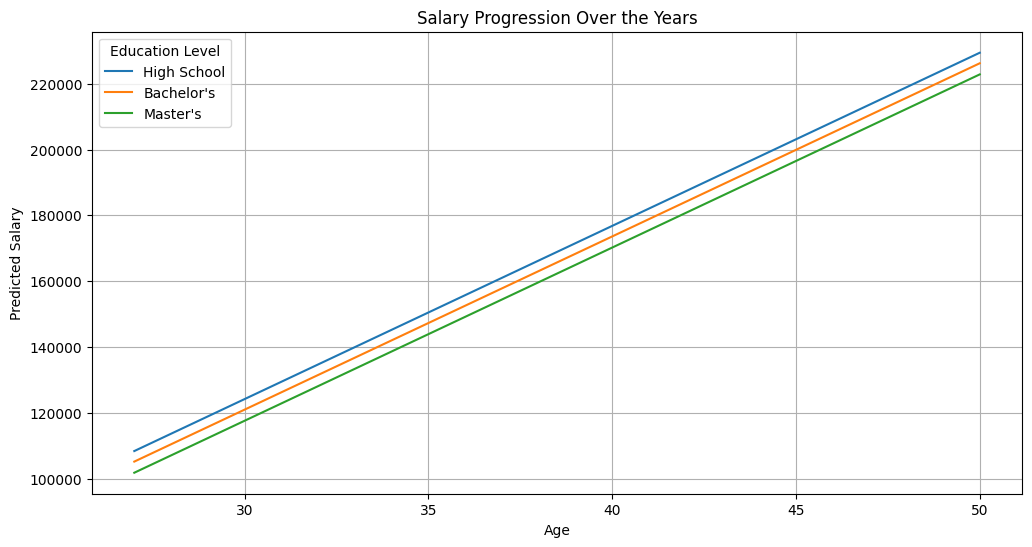

    Age Gender Education Level          Job Title  Years of Experience  \
24   27   Male      Bachelor's  Software Engineer                    3   
25   28   Male      Bachelor's  Software Engineer                    4   
26   29   Male      Bachelor's  Software Engineer                    5   
27   30   Male      Bachelor's  Software Engineer                    6   
28   31   Male      Bachelor's  Software Engineer                    7   

    Predicted Salary  
24     105247.227907  
25     110505.386168  
26     115763.544430  
27     121021.702692  
28     126279.860954  


In [25]:
#Create a comparison of the three people
import pandas as pd
import matplotlib.pyplot as plt

# Example fake data generation
start_age = 27
end_age = 50

# Define the template data for the three people
people = [
    {"Gender": "Male", "Education Level": "High School", "Job Title": "Software Engineer", "start_work": 7},
    {"Gender": "Male", "Education Level": "Bachelor's", "Job Title": "Software Engineer", "start_work": 3},
    {"Gender": "Male", "Education Level": "Master's", "Job Title": "Software Engineer", "start_work": 1}
]

# Generate the data for each person over the years
fake_data_list = []
for person in people:
    for age in range(start_age, end_age + 1):
        # Calculate Years of Experience as the difference between the current age and the start age (27)
        years_of_experience = age - start_age
        fake_data_list.append({
            "Age": age,
            "Gender": person["Gender"],
            "Education Level": person["Education Level"],
            "Job Title": person["Job Title"],
            "Years of Experience": years_of_experience + person["start_work"]
        })

# Create a DataFrame from the generated data
fake_data = pd.DataFrame(fake_data_list)

# Predict salaries for the generated fake data
predicted_salaries = model.predict(fake_data)
fake_data['Predicted Salary'] = predicted_salaries

# Plot the results
plt.figure(figsize=(12, 6))

# Plot salary progression for each education level
for education_level in fake_data["Education Level"].unique():
    subset = fake_data[fake_data["Education Level"] == education_level]
    plt.plot(subset["Age"], subset["Predicted Salary"], label=f"{education_level}")

# Add plot details
plt.title("Salary Progression Over the Years")
plt.xlabel("Age")
plt.ylabel("Predicted Salary")
plt.legend(title="Education Level")
plt.grid(True)
plt.show()

# Print the fake data with predictions (optional)
print(fake_data[fake_data["Education Level"] == "Bachelor's"].head())
